In [1]:
%matplotlib inline
import os
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk",font_scale=1.5)
sns.set_style('whitegrid')

In [2]:
# Path
main_dir   = os.path.normpath(r'C:\Users\new356\Google Drive\Nov2014 Data QC Completed Data')
out_dir    = os.path.join(main_dir,'CRHO_Combined_Netcdf')
nc_1       = os.path.join(main_dir,'Fortress_Pre_telemetry_QC_data\QC_Data_netcdf\Fortress_Pre_telemetry_QC_data.nc')
nc_2       = os.path.join(main_dir,'Fortress_2014_2016_QC_data\QC_Data_netcdf\Fortress_2014_2016_QC_data.nc')
nc_3       = os.path.join(main_dir,'Fortress_2016_PostNov2014Storm_QC_data\QC_Data_netcdf\Fortress_2016_PostNov2014Storm_QC_data.nc')

In [29]:
# Dict of station to station_name
station_names_CRHO = {'BNS':'Bonsai', 'BRP':'Burstall Pass', 'BWH':'Bow Hut', 'CNT':'Centennial Ridge', 'CRG':'Canadian Ridge', 
                      'CRN':'Canadian Ridge North', 
                      'FLG':'Fortress Ledge', 'FRG':'Fortress Ridge', 'FRS':'Fortress Ridge South',
                       'FSR':'Fisera Ridge', 'HLN':'Helen Lake', 'HMW':'Hay Meadows', 'LLF':'Level Forest', 
                      'PWL':'Power Line', 'PYT':'Peyto', 
                      'SIB':'Sibal', 'UPC':'Upper Clearning', 'UPF':'Upper Forest', 'VVW':'Vista View'}

# TIME ZONE IS MST

In [4]:
c_network = 'CRHO'

In [5]:
ds_1 = xr.open_dataset(nc_1)
ds_2 = xr.open_dataset(nc_2)
ds_3 = xr.open_dataset(nc_3)

In [6]:
orig_coords = ['Lat','Lon','Elevation'] # combine_first() can't handel coords merging

In [7]:
ds_1.reset_coords(orig_coords, inplace=True);
ds_2.reset_coords(orig_coords, inplace=True);
ds_3.reset_coords(orig_coords, inplace=True);

In [8]:
print(ds_1.time.values[0], ds_1.time.values[-1], ds_1.AirtemperatureA.notnull().sum().values)
print(ds_2.time.values[0], ds_2.time.values[-1], ds_2.AirtemperatureA.notnull().sum().values)
print(ds_3.time.values[0], ds_3.time.values[-1], ds_3.AirtemperatureA.notnull().sum().values)

2013-02-06T16:45:00.000000000 2014-11-03T14:45:00.000000000 254368
2005-03-10T15:30:00.000000000 2016-10-01T00:00:00.000000000 3262795
2016-05-11T16:15:00.000000000 2016-10-19T10:15:00.000000000 89368


In [9]:
# current issue is not ocmbining as we want it. Also dropping coords

In [10]:
# We want to merge these separte data sets together, they are overlapping, and may or may not contain missing data
# Note: combine_first uses the calling dataset as higher prioity if both data sets have overlapping values. Missing 
# in calling are filled with second data set
ds_temp = ds_1.combine_first(ds_2)
ds_m = ds_temp.combine_first(ds_3)

In [11]:
# Add Network
ds_m.coords['network'] = xr.DataArray([c_network for x in ds_m.station], dims='station')

In [12]:
# Add back in coords
ds_m.set_coords(orig_coords, inplace=True);

In [13]:
ds_m

<xarray.Dataset>
Dimensions:                           (station: 19, time: 407116)
Coordinates:
    Elevation                         (station) float64 2.099e+03 2.26e+03 ...
    Lat                               (station) float64 50.82 50.76 51.64 ...
    Lon                               (station) float64 -115.2 -115.4 -116.5 ...
  * time                              (time) datetime64[ns] 2005-03-10T15:30:00 ...
  * station                           (station) object 'BNS' 'BRP' 'BWH' ...
    network                           (station) <U4 'CRHO' 'CRHO' 'CRHO' ...
Data variables:
    IncrementalPrecipitationB         (station, time) float64 nan nan nan ...
    WindDirectionatA                  (station, time) float64 nan nan nan ...
    TotalPressureUnadjustedA          (station, time) float64 nan nan nan ...
    SoilTemperatureB                  (station, time) float64 nan nan nan ...
    DownwardSolarRadiation            (station, time) float64 nan nan nan ...
    SoilTemperatureA  

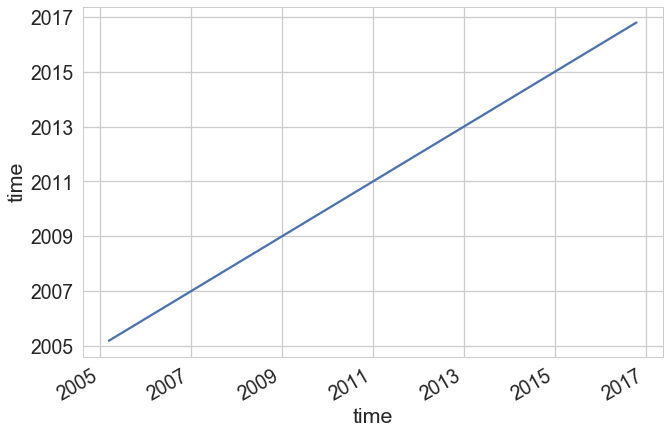

In [14]:
ds_m.AirtemperatureA.time.plot()

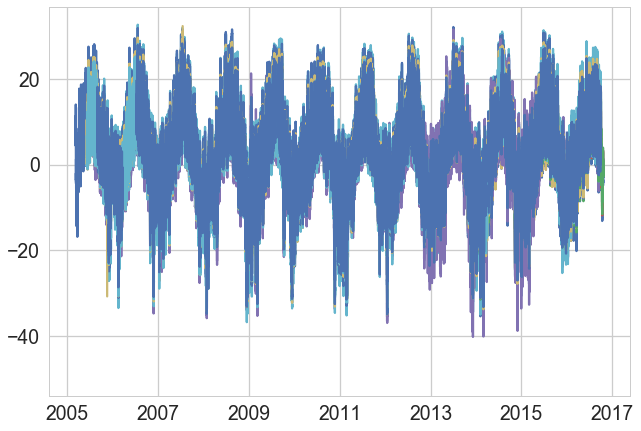

In [15]:
plt.figure()
plt.plot(ds_m.time,ds_m.AirtemperatureA.T.values);

In [40]:
ds_m.coords['station_name'] = xr.DataArray(list(station_names_CRHO.values()), 
                                           coords={'station': list(station_names_CRHO.keys())}, dims='station')

In [43]:
# print(ds_m.station_name.values)
# print(ds_m.station.values)

['Bonsai' 'Burstall Pass' 'Bow Hut' 'Centennial Ridge' 'Canadian Ridge'
 'Canadian Ridge North' 'Fortress Ledge' 'Fortress Ridge'
 'Fortress Ridge South' 'Fisera Ridge' 'Helen Lake' 'Hay Meadows'
 'Level Forest' 'Power Line' 'Peyto' 'Sibal' 'Upper Clearning'
 'Upper Forest' 'Vista View']
['BNS' 'BRP' 'BWH' 'CNT' 'CRG' 'CRN' 'FLG' 'FRG' 'FRS' 'FSR' 'HLN' 'HMW'
 'LLF' 'PWL' 'PYT' 'SIB' 'UPC' 'UPF' 'VVW']


In [44]:
ds_m.to_netcdf(os.path.join(out_dir,'CRHO_15min.nc'))

In [18]:
ds_m

<xarray.Dataset>
Dimensions:                           (station: 19, time: 407116)
Coordinates:
    Elevation                         (station) float64 2.099e+03 2.26e+03 ...
    Lat                               (station) float64 50.82 50.76 51.64 ...
    Lon                               (station) float64 -115.2 -115.4 -116.5 ...
  * time                              (time) datetime64[ns] 2005-03-10T15:30:00 ...
  * station                           (station) object 'BNS' 'BRP' 'BWH' ...
    network                           (station) <U4 'CRHO' 'CRHO' 'CRHO' ...
Data variables:
    IncrementalPrecipitationB         (station, time) float64 nan nan nan ...
    WindDirectionatA                  (station, time) float64 nan nan nan ...
    TotalPressureUnadjustedA          (station, time) float64 nan nan nan ...
    SoilTemperatureB                  (station, time) float64 nan nan nan ...
    DownwardSolarRadiation            (station, time) float64 nan nan nan ...
    SoilTemperatureA  

In [19]:
# Aggregate to different periods

# https://www.eol.ucar.edu/content/wind-direction-quick-reference
# Convert wind speed and direction to u/v components
def WS_Wdir_2_U_V(obs_wdr,obs_ws):
    import numpy as np
    RperD = (np.pi / 180.0)
    obs_U = -1 * obs_ws * np.sin(obs_wdr*RperD)
    obs_V = -1 * obs_ws * np.cos(obs_wdr*RperD)
    return (obs_U,obs_V)

# Convert U and V components to Wdir and Wind speed
def U_V_2_WS_Wdir(U,V):
    import numpy as np
    DperR = (180.0 / np.pi)
    Wdir = (np.arctan2(-1*U,-1*V) * DperR)%360 # needed to take modulus of 360
    WS   = np.sqrt(np.power(U,2)+np.power(V,2))
    return (WS,Wdir)

# Average WS and Wdir by component method
def avg_Ws_Wdir(obs_wdr,obs_ws,dt_freq):
    # Convert to U V
    (obs_U,obs_V) = WS_Wdir_2_U_V(obs_wdr,obs_ws)
    # Take average of components
    obs_U_agg = obs_U.resample(freq=dt_freq,dim='time',how='mean',label='right')
    obs_V_agg = obs_V.resample(freq=dt_freq,dim='time',how='mean',label='right')
    # Convert back to WS and Wdir
    (obs_ws_OUT,obs_wdir_OUT) = U_V_2_WS_Wdir(obs_U_agg,obs_V_agg)
    return (obs_ws_OUT,obs_wdir_OUT)

In [20]:
# Aggregate (allow a fraction of missing period)
percent_nan_allowed = 26 # (one 15 min out of an hour)
skipna = True # Skips nans when doing aggregation, then we remove those periods with less than percent_nan_allowed
dt_out = 'H'

# Aggregate booleans of not missing, to get fraction in agg period not missing
obs_fraction_OK = ds_m.notnull().resample(freq=dt_out, dim='time', how='mean', label='right')

# TODO: this behaves different on python 2.7 and 3.5, don't know why....
ds_1hr = ds_m.resample(freq=dt_out, dim='time', how='mean', label='right', skipna=skipna)

# For variables where we need to take the sum over the agg period
for xvar in  ['IncrementalPrecipitationA','IncrementalPrecipitationB','IncrementalPrecipitationC']:
    ds_1hr[xvar] = ds_m[xvar].resample(freq=dt_out, dim='time', how='sum', label='right', skipna=skipna).T # Transpose needed

# For variables where we need to take the median over the agg period
for xvar in  ['SnowDepthQCvalue']:
    ds_1hr[xvar] = ds_m[xvar].resample(freq=dt_out, dim='time', how='median', label='right').T # Transpose needed  
                         
# Wind speed component average
(obs_ws_D,obs_wdir_D) = avg_Ws_Wdir(ds_m['WindDirectionatA'], ds_m['ScalarWindSpeedA'], dt_out)
ds_1hr['WindDirectionatA'] = obs_wdir_D.T # Transpose needed
ds_1hr['ScalarWindSpeedA'] = obs_ws_D.T # Transpose needed
     
# Drop values where fraction exceeds the threshold
ds_1hr = ds_1hr.where(obs_fraction_OK >= (1-percent_nan_allowed/100) )

C:\Users\new356\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="H").mean() 
C:\Users\new356\Anaconda3\lib\site-packages\xarray\core\common.py:619: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)
C:\Users\new356\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="H").mean() 
C:\Users\new356\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="sum", instead consider using .resample(time="H").sum() 
C:\Users\new356\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: 
.resamp

In [21]:
# Rename time
ds_1hr = ds_1hr.rename({'time':'time_hrly'}); 

In [22]:
# Aggregate from 15 min to 1 hour
# ds_1hr = ds_m.resample(freq='H',dim='time',how='mean',label='right').rename({'time':'time_hrly'})

In [23]:
# # For variables where we need to take the sum over the agg period
# agg_vars = ['IncrementalPrecipitationA','IncrementalPrecipitationB','IncrementalPrecipitationC']
# for cvar in agg_vars:
#             ds_1hr[cvar] = ds_m[cvar].resample(freq='H',dim='time',how='sum',label='right').rename({'time':'time_hrly'}).T

In [24]:
# # For variable where we need the median
# median_var = ['SnowDepthQCvalue']
# for cvar in median_var:
#             ds_1hr[cvar] = ds_m[cvar].resample(freq='H',dim='time',how='median',label='right').rename({'time':'time_hrly'}).T

In [47]:
ds_1hr

<xarray.Dataset>
Dimensions:                           (station: 19, time_hrly: 101780)
Coordinates:
  * time_hrly                         (time_hrly) datetime64[ns] 2005-03-10T16:00:00 ...
    Elevation                         (station) float64 2.099e+03 2.26e+03 ...
    Lat                               (station) float64 50.82 50.76 51.64 ...
    Lon                               (station) float64 -115.2 -115.4 -116.5 ...
  * station                           (station) object 'BNS' 'BRP' 'BWH' ...
    network                           (station) <U4 'CRHO' 'CRHO' 'CRHO' ...
    station_name                      (station) <U20 'Bonsai' ...
Data variables:
    IncrementalPrecipitationB         (time_hrly, station) float64 nan nan ...
    WindDirectionatA                  (time_hrly, station) float64 nan nan ...
    TotalPressureUnadjustedA          (time_hrly, station) float64 nan nan ...
    SoilTemperatureB                  (time_hrly, station) float64 nan nan ...
    DownwardSolarRad

In [46]:
ds_1hr.to_netcdf(os.path.join(out_dir,'CRHO_1hour.nc'))